In [2]:
import numpy as np
import librosa

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn
seaborn.set(style = 'ticks')

import IPython.display

# Load wave

In [3]:
!pwd

/Users/williamz/Python/Instrument-Recognization


In [77]:
audio_path = 'Sound/Piano/325611__shadydave__my-love-piano-loop.mp3'

y, sr = librosa.load(audio_path,sr = 32000)
y.size

2151654

In [78]:
y1 = y[abs(y)>0.01]

In [80]:
IPython.display.Audio(data=y,rate = sr)

# Mel spectrogram

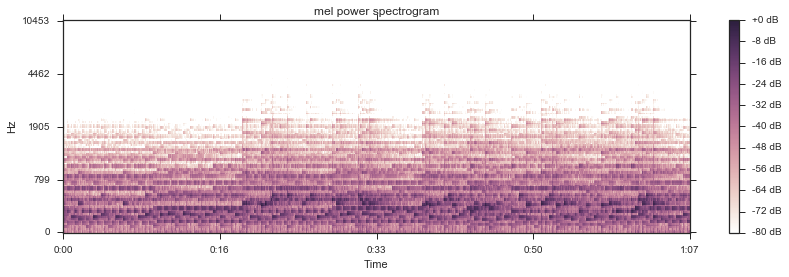

In [81]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr,n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [82]:
log_S.shape

(128, 4203)

# MFCC & $\Delta$ MFCC

(10, 4203)
(10, 4203)


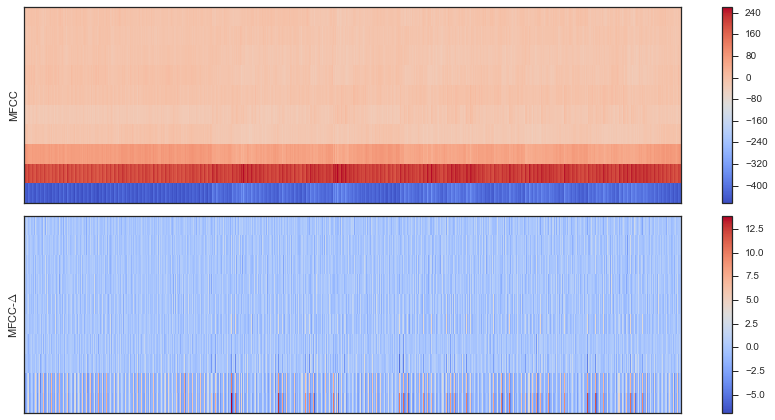

In [83]:
mfcc = librosa.feature.mfcc(y=y,sr=sr, n_mfcc=10)

delta_mfcc = librosa.feature.delta(mfcc)

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.tight_layout()
print(mfcc.shape)
print(delta_mfcc.shape)

# Spectual Centroid
$$S_c=u_1$$

4203

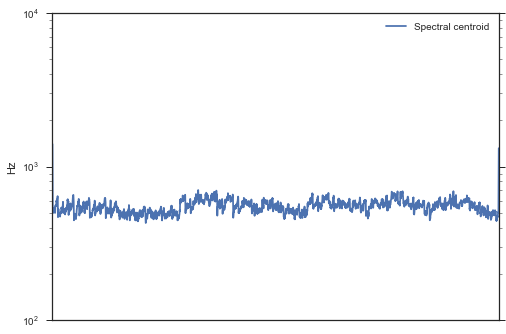

In [84]:
Sc = librosa.feature.spectral_centroid(y,sr=sr)
plt.figure()
plt.semilogy(Sc.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, Sc.shape[-1]])
plt.legend()
Sc.size

# Specural Width
$$S_w=\sqrt{u_2-u_1^2}$$

322

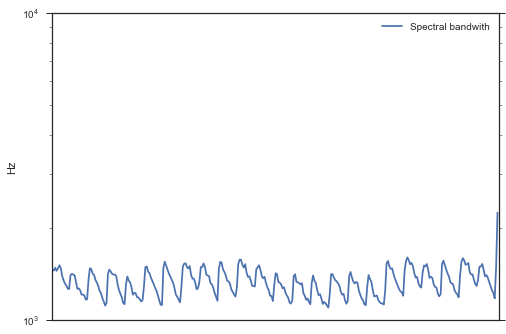

In [65]:
#using librosa bandwith
Sw1 = librosa.feature.spectral_bandwidth(y=y,sr=sr)
#using formula above
plt.figure()
plt.semilogy(Sw1.T, label='Spectral bandwith')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, Sc.shape[-1]])
plt.legend()
Sw1.size

# Spectral Asymmetry
$$S_a=\frac{2(u_1)^3-3u_1u_2+u_3}{S_w^3}$$

# Spectral Flatness
$$S_f=\frac{-3(u_1)^4+6u_1u_2-4u_1u_3+u_4}{S_w^4}-3$$